In [4]:
import pandas
import warnings
import functools
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import classification_report, confusion_matrix
from numpy  import array
from sklearn.preprocessing import power_transform, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import chi2_contingency

%matplotlib inline

In [5]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)

O target sera class_type

In [6]:
data = pandas.read_csv('zoo.csv')
data.head(1)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


### Ver se os dados estão balanceados

A quantidade de dados target, então tem que balancear

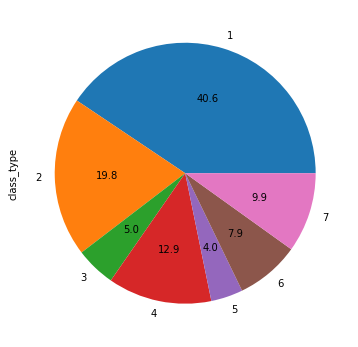

In [7]:
data.groupby(['class_type'])['class_type'].count().plot.pie(autopct='%.1f')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### Transformando os dados para categóricos

In [9]:
data = data.astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null category
hair           101 non-null category
feathers       101 non-null category
eggs           101 non-null category
milk           101 non-null category
airborne       101 non-null category
aquatic        101 non-null category
predator       101 non-null category
toothed        101 non-null category
backbone       101 non-null category
breathes       101 non-null category
venomous       101 non-null category
fins           101 non-null category
legs           101 non-null category
tail           101 non-null category
domestic       101 non-null category
catsize        101 non-null category
class_type     101 non-null category
dtypes: category(18)
memory usage: 9.6 KB


### Nomes de aimais para hot encode

In [11]:
nome_animal = data[['animal_name']].values.tolist()
nome_animal = array(nome_animal)
nome_animal[:5]

array([['aardvark'],
       ['antelope'],
       ['bass'],
       ['bear'],
       ['boar']], dtype='<U8')

In [12]:
label_encoder = preprocessing.LabelEncoder()
label_encoded = label_encoder.fit_transform(nome_animal)
label_encoded[:5]

array([0, 1, 2, 3, 4])

In [13]:
onehot_animal = preprocessing.OneHotEncoder(sparse=False)
values_animal = nome_animal.reshape(len(label_encoded), 1)
onehot_animal_encoder = onehot_animal.fit_transform(nome_animal)
onehot_animal_encoder

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
data['animal_name'] = onehot_animal_encoder

### Preditas

In [15]:
y = data.loc[:, data.columns.isin(['class_type'])].values
y[:5]

array([[1],
       [1],
       [4],
       [1],
       [1]])

### Preditoras

In [16]:
X = data.loc[:, ~data.columns.isin(['class_type'])].values
X[:5]


array([[1.0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1],
       [0.0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [0.0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0.0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1],
       [0.0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1]],
      dtype=object)

### Balanceando dados

In [17]:
#plt.hist(X[:, 0], bins=25)
#plt.show()

In [18]:
X_norm = power_transform(X, method='yeo-johnson') # aqui balanceia os dados

In [19]:
#plt.hist(X_norm[:, 0], bins=15)
#plt.show()

In [20]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(random_state=42)
#X_res, y_res = rus.fit_sample(X_norm, y)

#print(X_res.shape)
#print(y_res.shape)


### Treinando o modelo

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y_all = numpy.concatenate([y_train, y_test]).ravel()
unique, counts = numpy.unique(y_all, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 20, 3: 5, 4: 13, 5: 4, 6: 8, 7: 10}

### Usando LogistiRegression

In [23]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Fazendo a predição

In [24]:
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

### Verificando acurácia do modelo

In [25]:
accuracy_score(y_test, y_pred)

0.9523809523809523

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

   micro avg       0.95      0.95      0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [27]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


 tem o over sampling
 Olha direitinho a documentação dele